In [1]:
import pandas as pd
df=pd.read_csv('../data/student_performance.csv')
df.head()

,student_id,study_hours,attendance,exam_score,gender
0,1,2,65,45,Male
1,2,4,70,55,Female
2,3,6,80,65,Male
3,4,8,90,78,Female
4,5,1,50,40,Male


## Predicting Student Exam Scores with Linear Regression

### Why Linear Regression?

Linear Regression is chosen because it is a simple model for predicting a **numeric value** from one or more features.  

In this project:

- **Target:** `exam_score`  
- **Features:** `study_hours` and `attendance`  
- **Reason:** The relationship between study hours / attendance and exam scores is approximately **linear** (more study → higher score, more attendance → higher score).

### How Linear Regression Works

Linear Regression fits a straight line to the data:

\[
exam\_score = a \times study\_hours + b \times attendance + c
\]

Where:

- `a` → change in exam score per extra study hour  
- `b` → change in exam score per extra 1% attendance  
- `c` → base exam score (intercept)  

The model minimizes the difference between predicted and actual scores using **Mean Squared Error (MSE)**.

### Next Steps

1. Train the linear regression model on `study_hours` and `attendance`  
2. Predict exam scores on test data  
3. Evaluate model performance using **R² score** and **Mean Squared Error**  
4. Interpret coefficients to understand **feature impact**  
5. Visualize predicted vs actual exam scores


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
print(df.describe())


       student_id  study_hours  attendance  exam_score
count    20.00000    20.000000   20.000000   20.000000
mean     10.50000     5.350000   77.000000   65.850000
std       5.91608     2.433862   13.787867   15.037759
min       1.00000     1.000000   50.000000   40.000000
25%       5.75000     3.750000   67.250000   54.250000
50%      10.50000     5.500000   78.500000   65.500000
75%      15.25000     7.250000   88.500000   78.500000
max      20.00000     9.000000   98.000000   90.000000


In [7]:
print(df[["study_hours", "attendance", "exam_score"]].corr())

             study_hours  attendance  exam_score
study_hours     1.000000    0.975537    0.976493
attendance      0.975537    1.000000    0.976282
exam_score      0.976493    0.976282    1.000000


## Checking Feature Relationships with Correlation

Correlation measures how strongly two variables are related.  
- Values range from **-1 to 1**:
  - `1` → perfect positive correlation (both increase together)
  - `-1` → perfect negative correlation (one increases, the other decreases)
  - `0` → no linear correlation

In this project, we have three key variables:

- **study_hours** → Hours a student studies  
- **attendance** → Attendance percentage  
- **exam_score** → Exam score  

We can use correlation to check:

1. Does studying more relate to higher exam scores?  
2. Does better attendance relate to higher exam scores?  
3. Are study hours and attendance related to each other?

The `.corr()` function in pandas calculates the **Pearson correlation coefficient** between all selected columns and produces a table showing the strength of their relationships.  

Optionally, we can visualize the correlations using a **heatmap** for easier understanding.


## How Correlation is Calculated (Simple Explanation)

Correlation tells us **how strongly two variables are related**.  

- Positive correlation → both increase together  
- Negative correlation → one increases, the other decreases  
- Zero → no relationship  

### Step-by-Step Example

Suppose we have three students:

| student | study_hours | exam_score |
|---------|------------|------------|
| 1       | 2          | 50         |
| 2       | 4          | 60         |
| 3       | 6          | 70         |

We want to see if **study_hours** affects **exam_score**.

---

### Step 1: Find the average of each column

- Average study_hours: (2 + 4 + 6) ÷ 3 = 4  
- Average exam_score: (50 + 60 + 70) ÷ 3 = 60  

---

### Step 2: Compare each value to the average

For each student, subtract the average:

| student | study_hours - avg | exam_score - avg |
|---------|-----------------|----------------|
| 1       | 2 - 4 = -2      | 50 - 60 = -10  |
| 2       | 4 - 4 = 0       | 60 - 60 = 0    |
| 3       | 6 - 4 = 2       | 70 - 60 = 10   |

---

### Step 3: Multiply differences for each student

- Multiply each row: (-2)*(-10)=20, 0*0=0, 2*10=20  
- Sum: 20 + 0 + 20 = 40  

---

### Step 4: Divide by number of students minus 1

- Number of students = 3 → divide by 2 → 40 ÷ 2 = 20  
- This is called the **covariance** (it tells us if the variables move together).

---

### Step 5: Divide by standard deviation of each variable

- Standard deviation of study_hours = 2  
- Standard deviation of exam_score = 10  

Correlation = 20 ÷ (2 * 10) = 1  

- `1` means **perfect positive correlation** → as study hours increase, exam scores increase proportionally.

---

### Step 6: Python shortcut

You don’t have to calculate by hand — pandas does it:

```python
import pandas as pd

data = {"study_hours":[2,4,6], "exam_score":[50,60,70]}
df = pd.DataFrame(data)

print(df.corr())


In [10]:
# Features (inputs)
X = df[["study_hours","attendance"]]

# Target (output)
y = df["exam_score"]

print(X.head())
print(y.head())

   study_hours  attendance
0            2          65
1            4          70
2            6          80
3            8          90
4            1          50
0    45
1    55
2    65
3    78
4    40
Name: exam_score, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 17.78
R² Score: 0.85


In [14]:
# Coefficients & Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.25754717 0.81509434]
Intercept: -3.079245283018878


In [20]:
results = X_test.copy()
results["Actual_Exam_Score"] = y_test.values
results["Predicted_Exam_Score"] = y_pred

results

,study_hours,attendance,Actual_Exam_Score,Predicted_Exam_Score
0,2,65,45,52.416981
17,6,85,74,73.749057
15,3,63,52,52.044340
1,4,70,55,59.007547


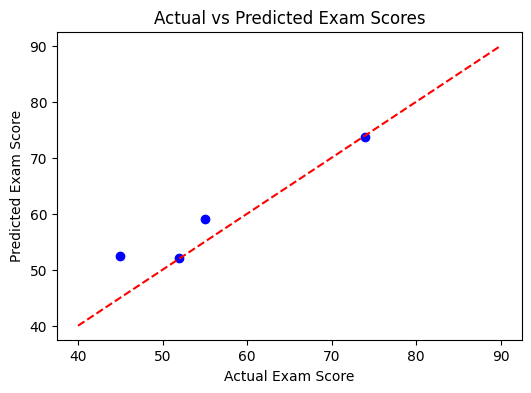

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()

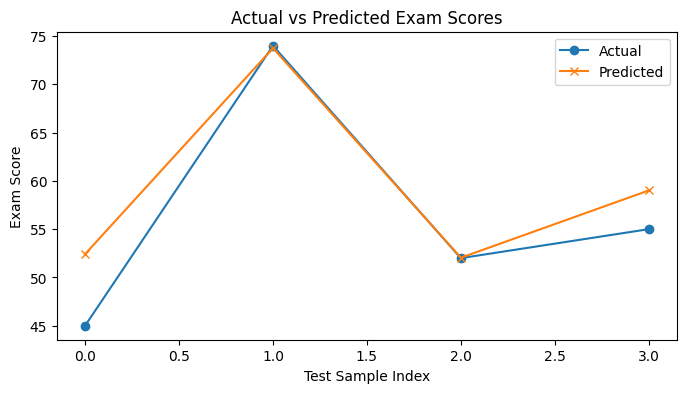

In [21]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


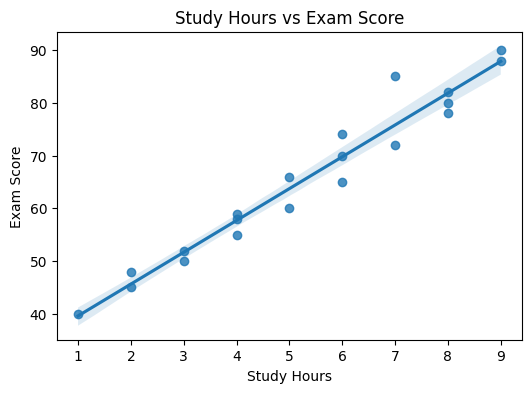

In [22]:
plt.figure(figsize=(6,4))
sns.regplot(x="study_hours", y="exam_score", data=df)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()


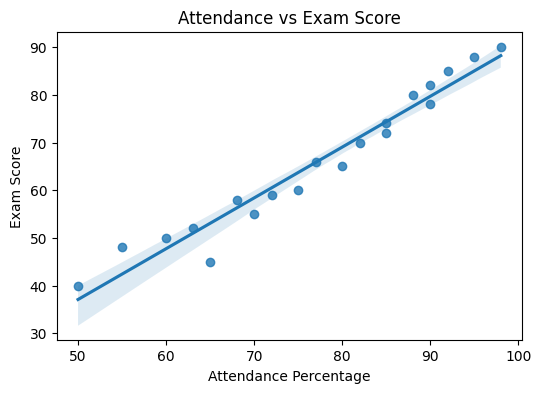

In [23]:
plt.figure(figsize=(6,4))
sns.regplot(x="attendance", y="exam_score", data=df)
plt.title("Attendance vs Exam Score")
plt.xlabel("Attendance Percentage")
plt.ylabel("Exam Score")
plt.show()


In [24]:
# Save predictions to CSV
df_pred = X_test.copy()
df_pred["actual_score"] = y_test
df_pred["predicted_score"] = y_pred
df_pred.to_csv("../data/student_score_predictions.csv", index=False)


## Insights from Linear Regression

1. Study hours have a positive coefficient → more study hours increase exam score.
2. Attendance has a positive coefficient → more attendance slightly increases exam score.
3. R^2 score shows how well the model explains exam scores based on these features.
4. Scatter plots show predicted vs actual exam scores, confirming model accuracy.